In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import CIFAR10

from net.wrn import WideResNet
from torch import load
from utils.util import GradCAM, show_cam_on_image

In [2]:
ori_transform = transforms.Compose([transforms.ToTensor()])

mean = [0.4913997551666284, 0.48215855929893703, 0.4465309133731618]
std = [0.2023, 0.1994, 0.2010]

val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

ori_dataset = CIFAR10(root='/root/Desktop/cifar10', train=False, download=False, transform=ori_transform)
valid_dataset = CIFAR10(root='/root/Desktop/cifar10', train=False, download=False, transform=val_transform)

Label:  0


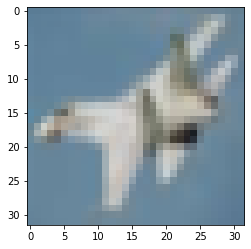

In [132]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num = 10
pic = ori_dataset[num][0]
print('Label: ', ori_dataset[num][1])
img = np.zeros((32, 32, 3), dtype=np.float)
img[:, :, 0] = pic[0]
img[:, :, 1] = pic[1]
img[:, :, 2] = pic[2]
plt.imshow(img)
plt.show()

In [4]:
model = WideResNet(depth=16, width_factor=8, dropout=0, in_channels=3, labels=10)
model = model.cuda()
checkpoint = load('/root/Desktop/best_model_wideresnet.pth')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

GradCAM

category id: [0]


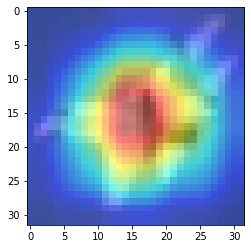

In [136]:
cam = GradCAM(model=model, target_layers=[model.f[3]])
grayscale_cam = cam(input_tensor=torch.unsqueeze(valid_dataset[num][0], dim=0).cuda(), target_category=None)[0, :]
# target_category = None: Max Likelihood Label , = 41: lawn_mower
plt.imshow(show_cam_on_image(img.astype(dtype=np.float32) / np.max(img), grayscale_cam, use_rgb=True))
plt.show()

In [80]:
pic = valid_dataset[num][0].cuda()
pic = torch.unsqueeze(pic, dim=0)
model.eval()
output1 = model.f[0](pic)
print(output1.shape)

torch.Size([1, 16, 32, 32])


In [81]:
img = np.zeros((32, 32), dtype=np.float)
output1 = output1.cpu()
output1 = output1.detach().numpy()

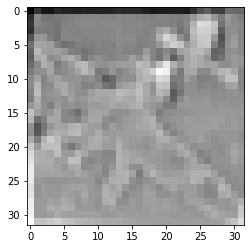

In [99]:
img[:, :] = output1[0][2]
plt.imshow(img, cmap ='gray')

In [100]:
output2 = model.f[1](model.f[0](pic))
print(output2.shape)

torch.Size([1, 128, 32, 32])


In [101]:
img = np.zeros((32, 32), dtype=np.float)
output2 = output2.cpu()
output2 = output2.detach().numpy()

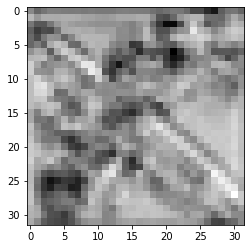

In [104]:
img[:, :] = output2[0][2]
plt.imshow(img, cmap ='gray')

In [109]:
output3 = model.f[2](model.f[1](model.f[0](pic)))
print(output3.shape)
img = np.zeros((16, 16), dtype=np.float)
output3 = output3.cpu()
output3 = output3.detach().numpy()

torch.Size([1, 256, 16, 16])


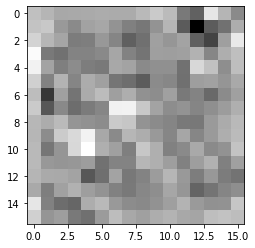

In [112]:
img[:, :] = output3[0][2]
plt.imshow(img, cmap ='gray')